In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
def knn_comparison(data, n_neighbors = 15):
    X=data[:,:2]
    y=data[:,2]
    h = .02   
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF']) 
    clf =KNeighborsClassifier(n_neighbors = 15)
    clf.fit(X,y)
    grid_space=0.2
    x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max =X[:,1].min()-1,X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,grid_space),np.arange(y_min, y_max,grid_space))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.pcolormesh(z,xx,yy,cmap =cmap_light)
    plt.scatter(X[:,0],X[:,1],cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('K values = '+str(n_neighbors))
    plt.show()

In [3]:

data=np.genfromtxt('/home/vinod/Downloads/demo_data/6.overlap.csv',delimiter=',')

In [4]:
X=data[:,:2].shape
y=data[:,2].shape

In [5]:
k=[1,5,15,30,50]

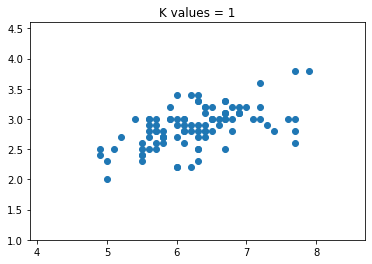

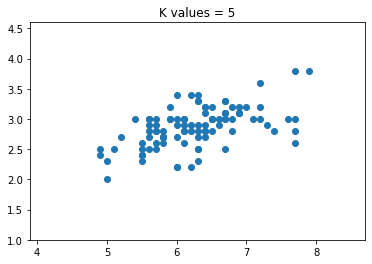

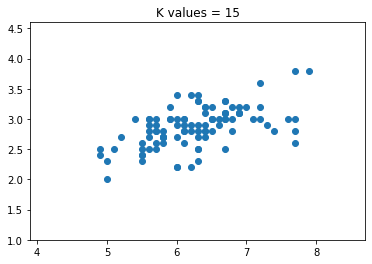

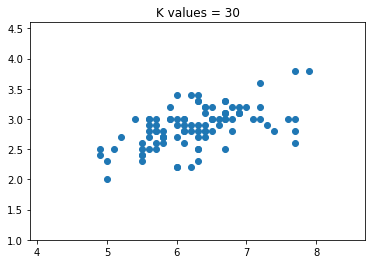

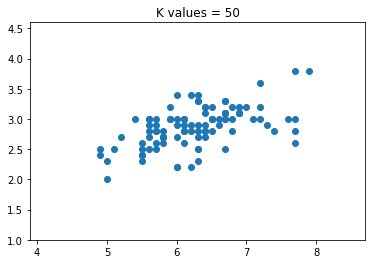

In [6]:
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


In [7]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/1.ushape.csv',delimiter=',')

In [8]:
k=[1,5,15,30]

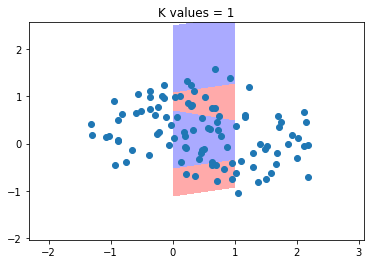

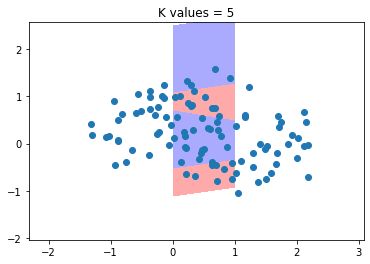

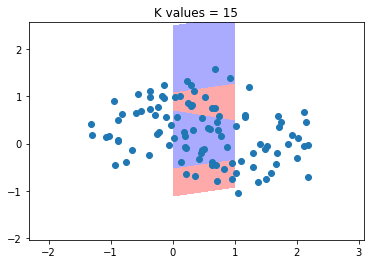

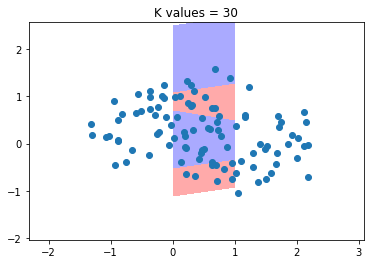

In [9]:
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)

    

In [10]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/3.concertriccir2.csv',delimiter=',')

In [11]:
k=[1,5,15]

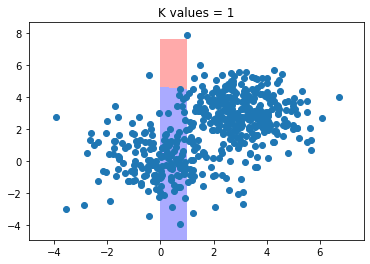

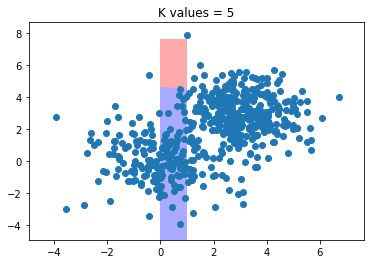

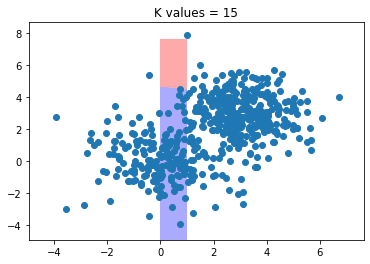

In [12]:
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


In [13]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/4.linearsep.csv',delimiter=',')

In [14]:
k=[1,5,15]

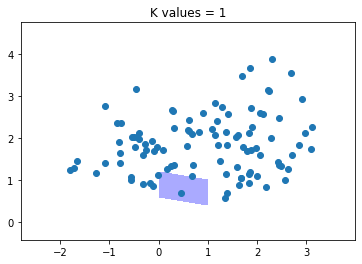

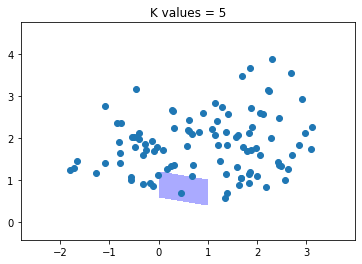

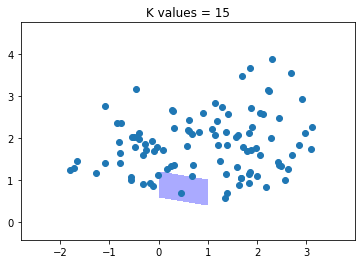

In [15]:
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


In [16]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/4.linearsep.csv',delimiter=',')

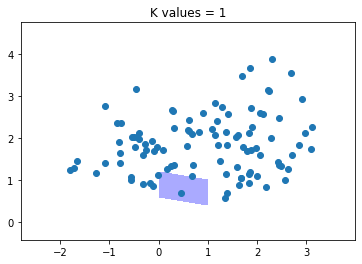

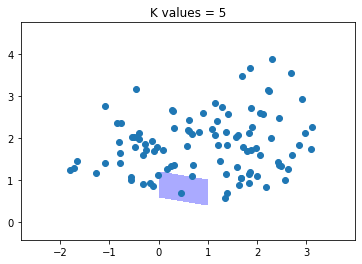

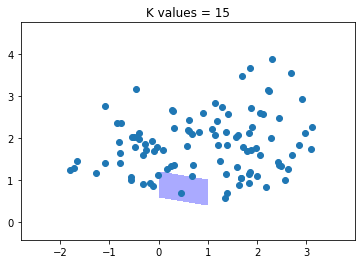

In [17]:
k=[1,5,15]
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


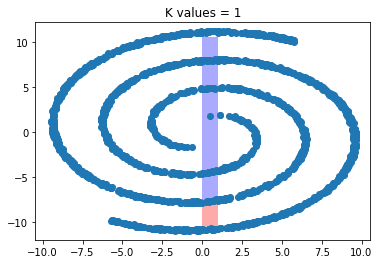

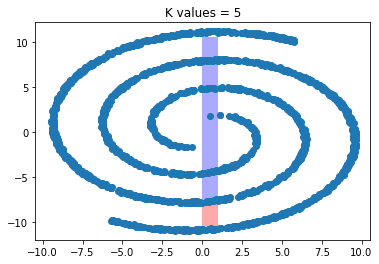

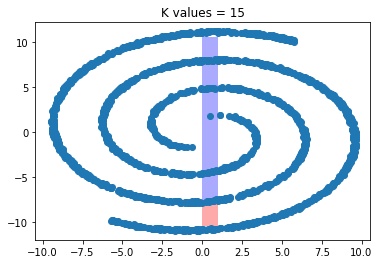

In [18]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/8.twospirals.csv',delimiter=',')
k=[1,5,15]
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


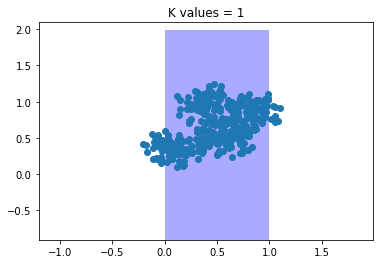

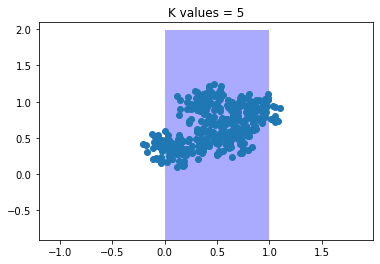

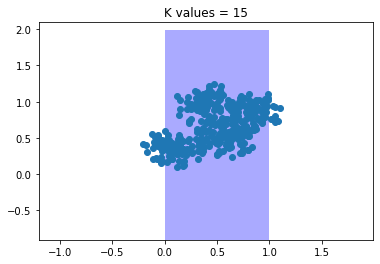

In [19]:
data=np.genfromtxt('/home/vinod/Downloads/demo_data/9.random.csv',delimiter=',')
k=[1,5,15]
for neighbour in k:
    knn_comparison(data, n_neighbors =neighbour)


In [20]:
dataset=pd.read_csv('/home/vinod/Downloads/Social_Network_Ads.csv')

In [21]:
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Using label encoder covert categeorical to numerical

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [24]:
le=LabelEncoder()
le.fit(dataset.Gender)


LabelEncoder()

In [25]:
dataset.Gender=le.fit_transform(dataset.Gender)

In [26]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [27]:
X=dataset.iloc[:,:3]
y=dataset.iloc[:,-1]

# devided the data into train and test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
sc=StandardScaler()

In [31]:
X_train=sc.fit_transform(X_train)

In [32]:
X_test=sc.fit_transform(X_test)

In [33]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [34]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred=classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
print('The accuracy score is {:.4f}'.format(accuracy_score(y_test,y_pred)))

The accuracy score is 0.9000


In [38]:
classifier.score(X_test,y_test)

0.9

In [39]:
print(confusion_matrix(y_test,y_pred))

[[49  3]
 [ 5 23]]


In [40]:
k_range=range(1,25)
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=knn.score(X_test,y_test)
    score.append(accuracy)

In [41]:
print(score)

[0.75, 0.725, 0.875, 0.8875, 0.9, 0.875, 0.8875, 0.9, 0.9, 0.9125, 0.9125, 0.8875, 0.8875, 0.9, 0.9, 0.9125, 0.9, 0.8875, 0.8875, 0.875, 0.8875, 0.8875, 0.9, 0.9125]


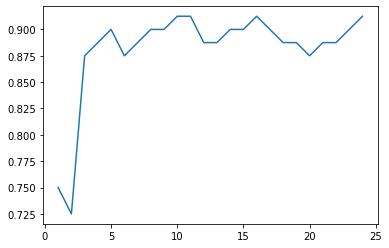

In [42]:
plt.plot(k_range,score)